C:\Users\MUSTAQEEM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MUSTAQEEM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MUSTAQEEM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MUSTAQEEM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a m

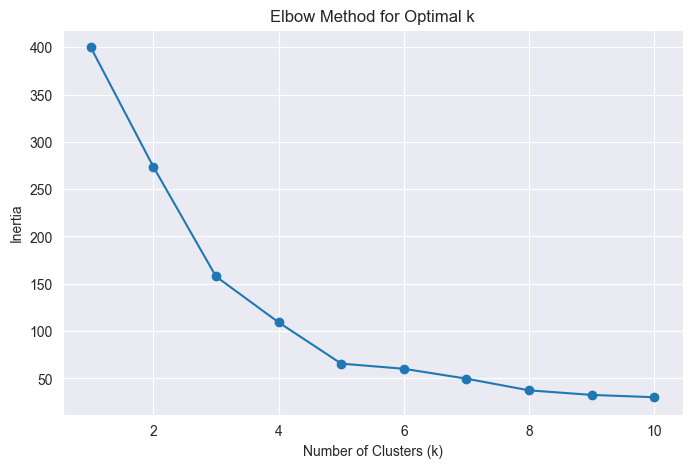

C:\Users\MUSTAQEEM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


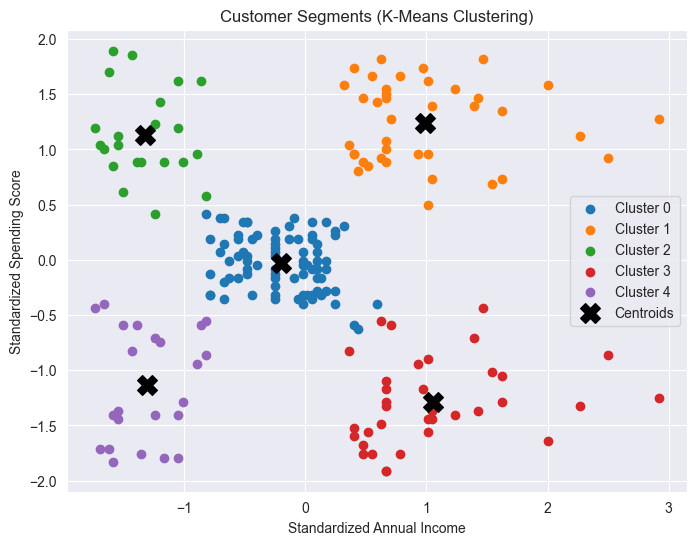

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [1]:
# Customer Segmentation using K-Means Clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#  Loading the dataset
df = pd.read_csv("data/Mall_Customers.csv")

#  Selecting relevant features for clustering
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#  Featuring Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Using Elbow Method to find optimal number of clusters (k)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Applying K-Means with optimal k (e.g. 5 based on elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualizing clusters in 2D
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        scaled_data[clusters == i, 0],
        scaled_data[clusters == i, 1],
        label=f"Cluster {i}"
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.legend()
plt.grid(True)
plt.show()

# Displaying clustered data
df.head()
